In [1]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import cv2

In [8]:
image = cv2.imread("9sas.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [21]:
def filter_image(rgb_image):
    image_hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    mask_H = (image_hsv[:, :, 0] <= 130) * (image_hsv[:, :, 0] >= 100)
    mask_S = (image_hsv[:, :, 1] <= 300) * (image_hsv[:, :, 1] >= 100)
    mask_V = (image_hsv[:, :, 2] <= 250) * (image_hsv[:, :, 2] >= 150)

    out = rgb_image.copy()
    out[:, :, 0] = out[:, :, 0] * mask_H * mask_S * mask_V
    out[:, :, 1] = out[:, :, 1] * mask_H * mask_S * mask_V
    out[:, :, 2] = out[:, :, 2] * mask_H * mask_S * mask_V

    plt.imshow(out)

    kernel = np.array([
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ])

    return cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)


def get_margin(image):
    step = 3
    t, b, l, r = 0, image.shape[0]-1, 0, image.shape[1]-1
    for y in range(0, image.shape[0], step):
        if np.sum(image[y, :]) > 0 and not t:
            t = y
        if np.sum(image[image.shape[0] - y - 1, :]) > 0 and not b:
            b = y

    for x in range(0, image.shape[1], step):
        if np.sum(image[:, x]) > 0 and not l:
            l = x
        if np.sum(image[:, image.shape[1] - x - 1]) > 0 and not r:
            r = image.shape[1] - x

    return t, b, l, r

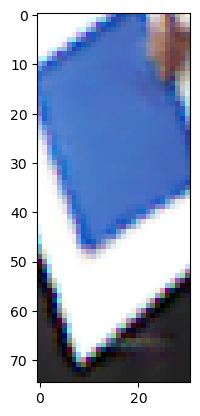

In [23]:
t, b, l, r = get_margin(filter_image(image_rgb))

plt.imshow(image_rgb[t:b, l:r])